In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import seaborn as sns

In [11]:
dowjones = sns.load_dataset('dowjones')

In [12]:
dowjones

,Date,Price
0,1914-12-01,55.00
1,1915-01-01,56.55
2,1915-02-01,56.00
3,1915-03-01,58.30
4,1915-04-01,66.45
...,...,...
644,1968-08-01,883.72
645,1968-09-01,922.80
646,1968-10-01,955.47
647,1968-11-01,964.12


In [14]:
dowjones.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    649 non-null    object 
 1   Price   649 non-null    float64
dtypes: float64(1), object(1)
memory usage: 10.3+ KB


In [16]:
dowjones['Date'] = pd.to_datetime(dowjones['Date'])

In [17]:
dowjones

,Date,Price
0,1914-12-01,55.00
1,1915-01-01,56.55
2,1915-02-01,56.00
3,1915-03-01,58.30
4,1915-04-01,66.45
...,...,...
644,1968-08-01,883.72
645,1968-09-01,922.80
646,1968-10-01,955.47
647,1968-11-01,964.12


In [18]:
dowjones.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    649 non-null    datetime64[ns]
 1   Price   649 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 10.3 KB


In [19]:
dowjones.describe(include = 'all')

C:\Users\Owner\AppData\Local\Temp\ipykernel_1328\2572113858.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  dowjones.describe(include = 'all')


,Date,Price
count,649,649.000000
unique,649,NaN
top,1914-12-01 00:00:00,NaN
freq,1,NaN
first,1914-12-01 00:00:00,NaN
last,1968-12-01 00:00:00,NaN
mean,NaN,290.807319
std,NaN,256.062906
min,NaN,46.850000
25%,NaN,106.900000


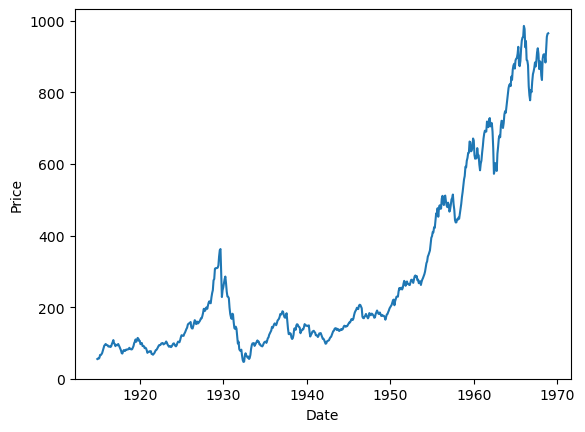

In [25]:
sns.lineplot(x= dowjones['Date'], y= dowjones['Price'])
plt.show()

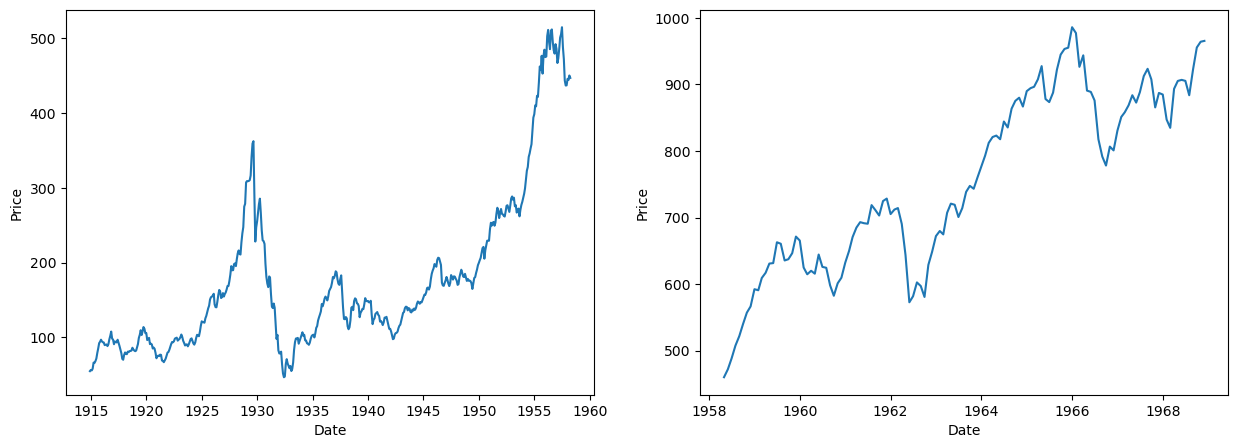

In [30]:
X_train = dowjones.iloc[:521]
x_test = dowjones.iloc[521:]

plt.figure(figsize=(15, 5))
plt.subplot(1,2,1)
sns.lineplot(x= 'Date', y='Price', data=X_train)

plt.subplot(1,2,2)
sns.lineplot(x= 'Date', y='Price',data=x_test)

plt.show()

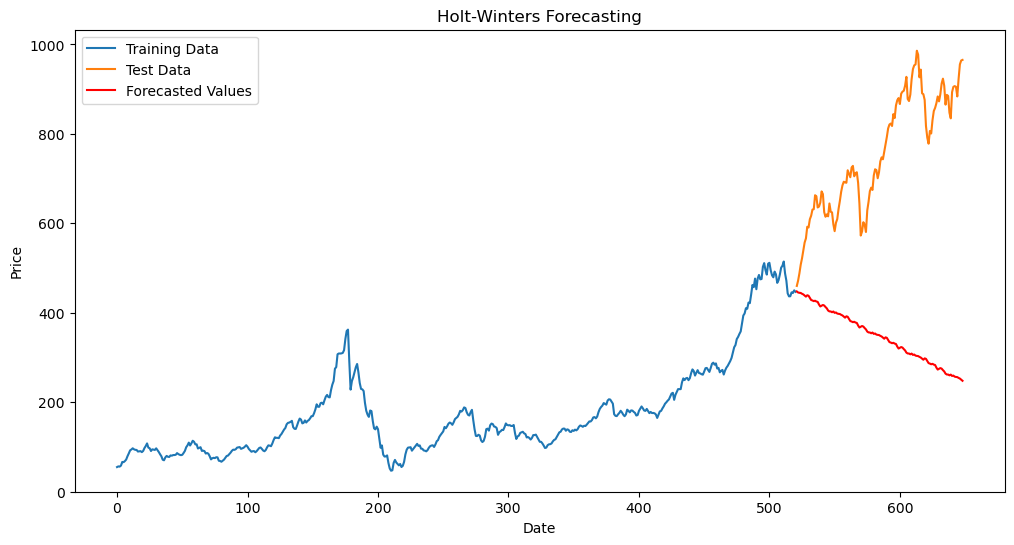

Wall time: 695 ms


In [33]:
%%time

from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Create & Fit the Holt-Winters exponential smoothing model to the training data
model = ExponentialSmoothing(X_train['Price'], trend='add', seasonal='add', seasonal_periods=30)
fitted_model = model.fit()

# Forecast future values using the fitted model
forecast_values = fitted_model.forecast(steps=len(x_test))

# Plot the actual data and forecasted values
plt.figure(figsize=(12, 6))
plt.plot(X_train.index, X_train['Price'], label='Training Data')
plt.plot(x_test.index, x_test['Price'], label='Test Data')
plt.plot(x_test.index, forecast_values, label='Forecasted Values', color='red')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Holt-Winters Forecasting')
plt.legend()
plt.show()

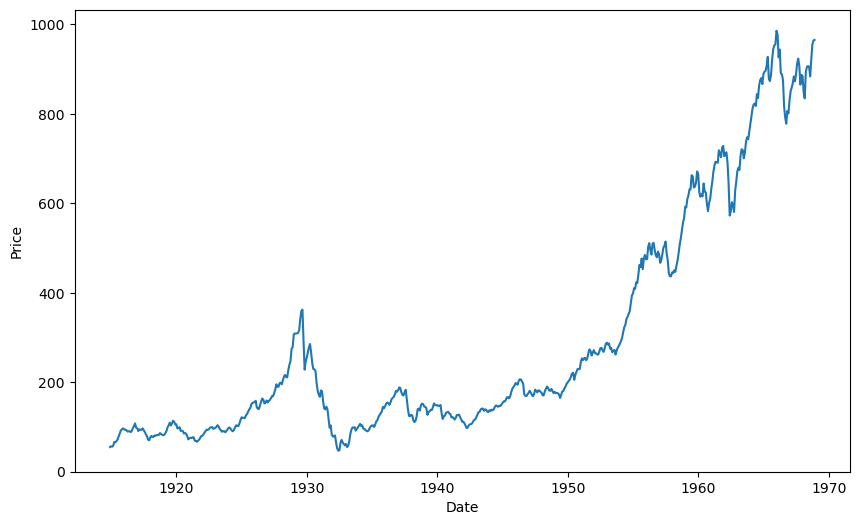

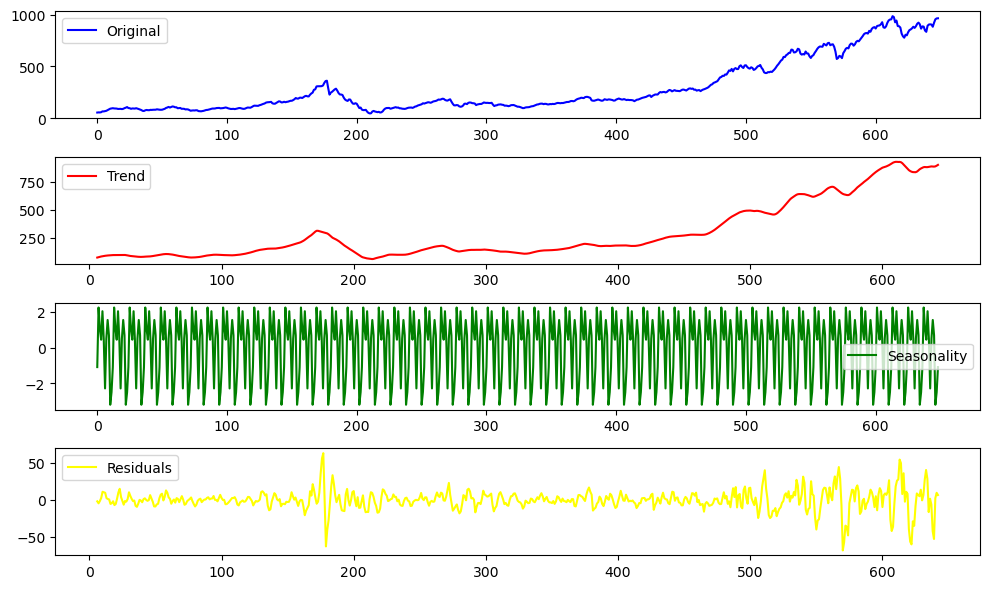

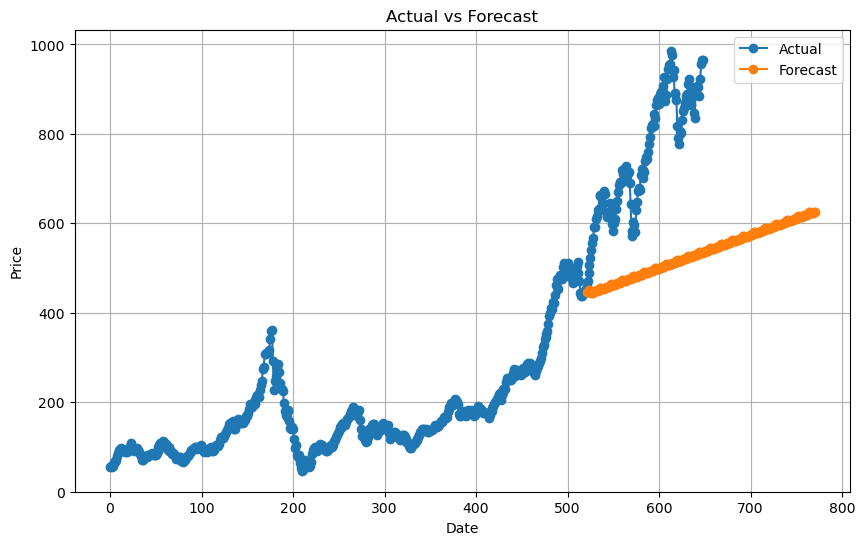

In [45]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Visualize the time series
plt.figure(figsize=(10, 6))
sns.lineplot(x = 'Date', y= 'Price', data = dowjones)

# Decompose the time series to check for trend, seasonality, and residuals
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(dowjones['Price'], model='additive', period=12)
plt.figure(figsize=(10, 6))
plt.subplot(411)
plt.plot(dowjones['Price'], label='Original', color='blue')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(decomposition.trend, label='Trend', color='red')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(decomposition.seasonal, label='Seasonality', color='green')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(decomposition.resid, label='Residuals', color='yellow')
plt.legend(loc='best')
plt.tight_layout()


# Fit SARIMA model
order = (1, 1, 1)  # ARIMA order
seasonal_order = (1, 1, 1, 12)  # Seasonal order
model = SARIMAX(X_train['Price'], order=order, seasonal_order=seasonal_order)
results = model.fit()

# Predict future values
future_steps = 250  # Change this according to your needs
forecast = results.forecast(steps=future_steps)

# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.plot(dowjones.index, dowjones['Price'], label='Actual', marker='o')
plt.plot(forecast.index, forecast, label='Forecast', marker='o')
plt.title('Actual vs Forecast')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()